In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import pickle

In [76]:
df = pd.read_csv("Train.csv")
df.shape

(31647, 18)

In [77]:
df.head(10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,NaN,0,unknown,1
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,NaN,0,unknown,1
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,210.0,1.0,NaN,0,unknown,0
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,NaN,0,unknown,0
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,NaN,0,unknown,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31028.0,40.439216,10.751392,18.0,32.0,39.0,48.00,97.0
balance,31248.0,1368.112615,3085.342417,-8020.0,72.0,449.0,1413.00,102128.0
day_of_month,31647.0,15.818561,8.322970,1.0,8.0,16.0,21.00,31.0
last_contact_duration,31336.0,256.184038,256.181479,0.0,103.0,179.0,315.25,4900.0
num_contacts_in_campaign,31535.0,2.776629,3.153293,1.0,1.0,2.0,3.00,63.0
days_since_prev_campaign_contact,5816.0,224.995186,114.991828,1.0,133.0,195.0,329.00,871.0
num_contacts_prev_campaign,31647.0,0.591620,2.499675,0.0,0.0,0.0,0.00,275.0
term_deposit_subscribed,31647.0,0.107246,0.309430,0.0,0.0,0.0,0.00,1.0


In [80]:
df['id'].value_counts()

id
id_1723     1
id_43823    1
id_32289    1
id_10523    1
id_43951    1
           ..
id_38719    1
id_44317    1
id_1993     1
id_16413    1
id_13459    1
Name: count, Length: 31647, dtype: int64

In [81]:
df.describe(include=['object'])

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,31647,31647,31497,31647,31647,31647,31498,31647,31647,31647
unique,31647,12,3,4,2,2,2,3,12,4
top,id_1723,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,6816,18945,16247,31094,17700,26463,20480,9685,25833


In [82]:
df.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [83]:
num_cols = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

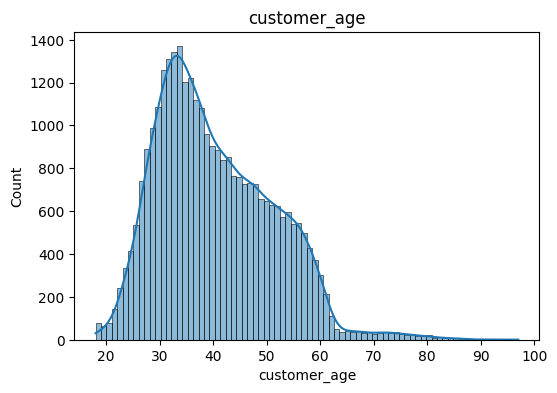

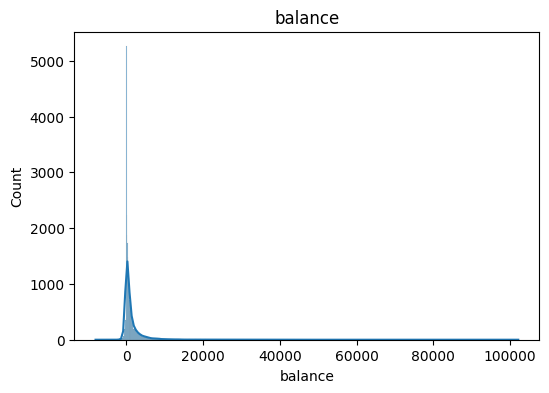

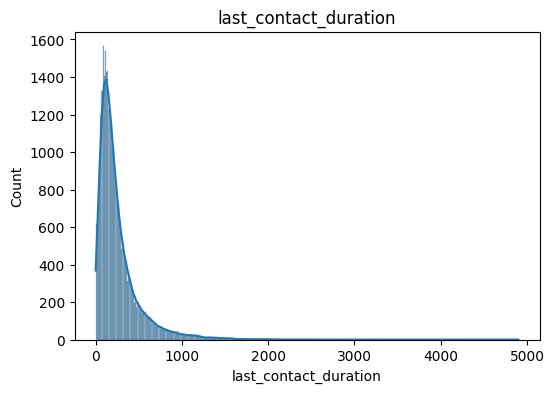

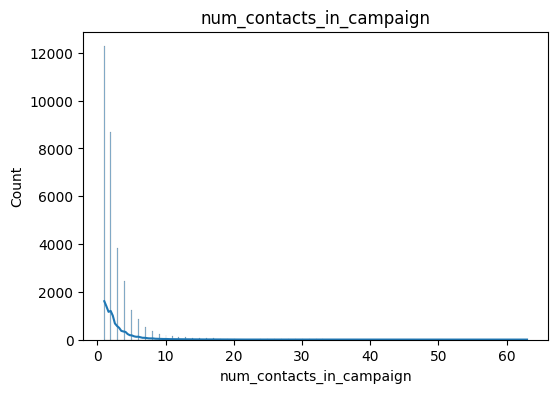

In [84]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [85]:
exclude_column = 'days_since_prev_campaign_contact'

In [86]:
all_columns = df.columns.tolist()

In [87]:
columns_to_check = [col for col in all_columns if col != exclude_column]

In [88]:
df_cleaned = df.dropna(subset=columns_to_check)

In [89]:
df = df_cleaned

In [90]:
df.isnull().sum()

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    24453
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

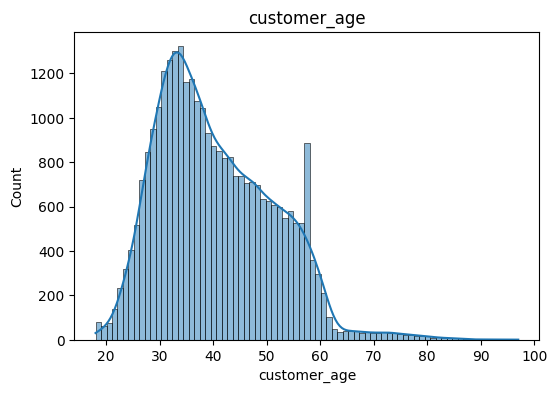

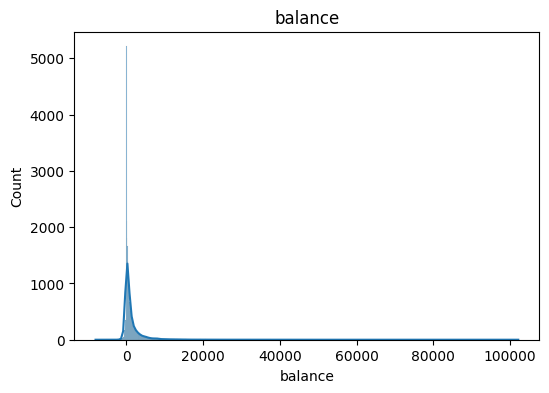

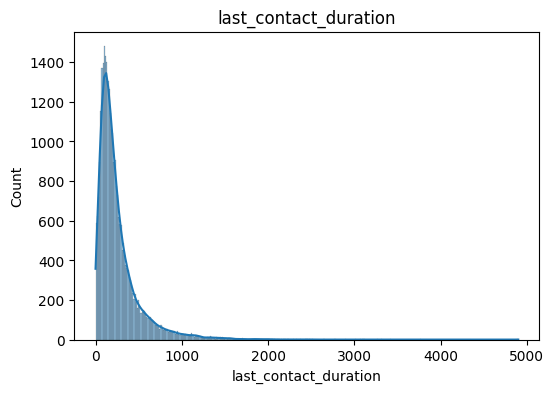

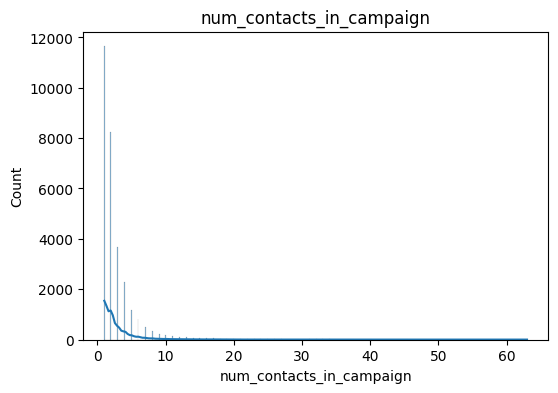

In [91]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [92]:
df = df.drop_duplicates(subset=['id'])
df = df.drop_duplicates()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29948 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                29948 non-null  object 
 1   customer_age                      29948 non-null  float64
 2   job_type                          29948 non-null  object 
 3   marital                           29948 non-null  object 
 4   education                         29948 non-null  object 
 5   default                           29948 non-null  object 
 6   balance                           29948 non-null  float64
 7   housing_loan                      29948 non-null  object 
 8   personal_loan                     29948 non-null  object 
 9   communication_type                29948 non-null  object 
 10  day_of_month                      29948 non-null  int64  
 11  month                             29948 non-null  object 
 12  last_cont

In [94]:
df['job_type'].value_counts()

job_type
blue-collar      6439
management       6285
technician       4964
admin.           3424
services         2776
retired          1496
self-employed    1072
entrepreneur      969
unemployed        865
housemaid         841
student           629
unknown           188
Name: count, dtype: int64

In [95]:
df['job_type'] = df['job_type'].replace({'admin.': 'admin'})

In [96]:
df['education'].value_counts()

education
secondary    15392
tertiary      8793
primary       4531
unknown       1232
Name: count, dtype: int64

In [97]:
df['days_since_prev_campaign_contact'].value_counts()

days_since_prev_campaign_contact
182.0    110
92.0     103
91.0      89
183.0     87
181.0     78
        ... 
871.0      1
21.0       1
508.0      1
413.0      1
399.0      1
Name: count, Length: 504, dtype: int64

In [98]:
df.sample(n = 10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
16006,id_4019,31.0,technician,single,secondary,no,523.0,yes,no,cellular,16,apr,218.0,2.0,NaN,0,unknown,0
7445,id_11164,32.0,housemaid,single,secondary,no,-123.0,yes,yes,cellular,13,may,94.0,5.0,NaN,0,unknown,0
19599,id_33512,48.0,services,single,unknown,no,5094.0,yes,no,cellular,20,nov,139.0,2.0,157.0,1,failure,0
2961,id_20658,44.0,blue-collar,married,unknown,no,133.0,yes,no,unknown,6,may,220.0,1.0,NaN,0,unknown,0
30342,id_10203,55.0,admin,married,secondary,no,1550.0,yes,yes,cellular,6,feb,2.0,6.0,190.0,27,other,0
10899,id_27024,50.0,technician,divorced,secondary,no,-701.0,yes,yes,cellular,24,jul,164.0,1.0,NaN,0,unknown,0
20247,id_8481,36.0,unemployed,single,tertiary,no,1031.0,no,no,telephone,4,feb,68.0,1.0,NaN,0,unknown,0
15212,id_12359,39.0,admin,married,secondary,no,91.0,no,no,cellular,5,feb,100.0,1.0,182.0,3,success,0
26343,id_1240,32.0,technician,married,tertiary,no,-1.0,yes,yes,cellular,21,nov,100.0,1.0,NaN,0,unknown,0
20260,id_26143,32.0,technician,single,secondary,no,26.0,no,yes,cellular,25,jul,99.0,1.0,NaN,0,unknown,0


In [99]:
df['days_since_prev_campaign_contact'].value_counts()

days_since_prev_campaign_contact
182.0    110
92.0     103
91.0      89
183.0     87
181.0     78
        ... 
871.0      1
21.0       1
508.0      1
413.0      1
399.0      1
Name: count, Length: 504, dtype: int64

In [100]:
df.dtypes

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

In [101]:
df.isnull().sum()

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    24453
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [102]:
df['was_contacted_prev'] = df['days_since_prev_campaign_contact'].notna().astype(int)
df['days_since_prev_campaign_contact'] = df['days_since_prev_campaign_contact'].fillna(0)

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,29948.0,40.439896,10.737510,18.0,32.0,39.0,48.0,97.0
balance,29948.0,1365.784026,3098.998810,-8020.0,72.0,449.0,1410.0,102128.0
day_of_month,29948.0,15.826366,8.315455,1.0,8.0,16.0,21.0,31.0
last_contact_duration,29948.0,256.655269,257.092066,0.0,103.0,180.0,316.0,4900.0
num_contacts_in_campaign,29948.0,2.774342,3.142506,1.0,1.0,2.0,3.0,63.0
days_since_prev_campaign_contact,29948.0,41.358688,100.238187,0.0,0.0,0.0,0.0,871.0
num_contacts_prev_campaign,29948.0,0.590390,2.528340,0.0,0.0,0.0,0.0,275.0
term_deposit_subscribed,29948.0,0.107787,0.310116,0.0,0.0,0.0,0.0,1.0
was_contacted_prev,29948.0,0.183485,0.387070,0.0,0.0,0.0,0.0,1.0


In [104]:
df.dtypes

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
was_contacted_prev                    int64
dtype: object

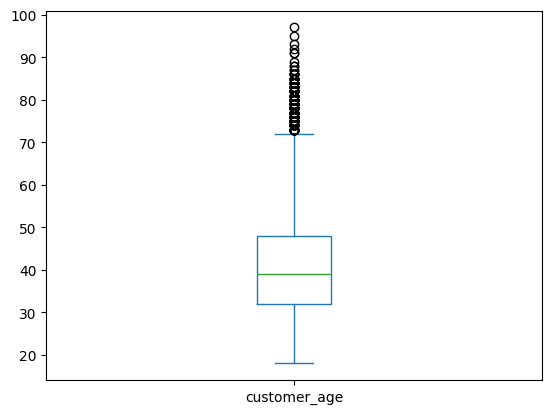

In [105]:
df['customer_age'].plot(kind='box')
plt.show()

In [106]:
df[df['customer_age'] > 70]['job_type'].value_counts()

job_type
retired          268
housemaid         13
management         7
unknown            7
technician         3
admin              3
self-employed      3
blue-collar        2
services           1
entrepreneur       1
Name: count, dtype: int64

In [107]:
df['balance'] = winsorize(df['balance'], limits=[0.01, 0.01])
df['last_contact_duration'] = winsorize(df['last_contact_duration'], limits=[0.01, 0.01])
df['num_contacts_in_campaign'] = winsorize(df['num_contacts_in_campaign'], limits=[0.01, 0.01])
df['num_contacts_prev_campaign'] = winsorize(df['num_contacts_prev_campaign'], limits=[0.01, 0.01])
df['customer_age'] = winsorize(df['customer_age'], limits=[0.01, 0.01])


In [108]:
df.describe().T

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the Maske

,count,mean,std,min,25%,50%,75%,max
customer_age,29948.0,40.397322,10.512269,22.0,32.0,39.0,48.0,71.0
balance,29948.0,1276.647122,2252.992078,-628.0,72.0,449.0,1410.0,13186.0
day_of_month,29948.0,15.826366,8.315455,1.0,8.0,16.0,21.0,31.0
last_contact_duration,29948.0,253.014659,234.778775,5.0,103.0,180.0,316.0,1278.0
num_contacts_in_campaign,29948.0,2.707794,2.654992,1.0,1.0,2.0,3.0,17.0
days_since_prev_campaign_contact,29948.0,41.358688,100.238187,0.0,0.0,0.0,0.0,871.0
num_contacts_prev_campaign,29948.0,0.527748,1.466742,0.0,0.0,0.0,0.0,9.0
term_deposit_subscribed,29948.0,0.107787,0.310116,0.0,0.0,0.0,0.0,1.0
was_contacted_prev,29948.0,0.183485,0.387070,0.0,0.0,0.0,0.0,1.0


In [109]:
df = df[df['last_contact_duration'] > 0]

In [110]:
df = df[df['num_contacts_in_campaign'] >= 0]

In [111]:
df = df[df['num_contacts_prev_campaign'] >= 0]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29948 entries, 0 to 31646
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                29948 non-null  object 
 1   customer_age                      29948 non-null  float64
 2   job_type                          29948 non-null  object 
 3   marital                           29948 non-null  object 
 4   education                         29948 non-null  object 
 5   default                           29948 non-null  object 
 6   balance                           29948 non-null  float64
 7   housing_loan                      29948 non-null  object 
 8   personal_loan                     29948 non-null  object 
 9   communication_type                29948 non-null  object 
 10  day_of_month                      29948 non-null  int64  
 11  month                             29948 non-null  object 
 12  last_cont

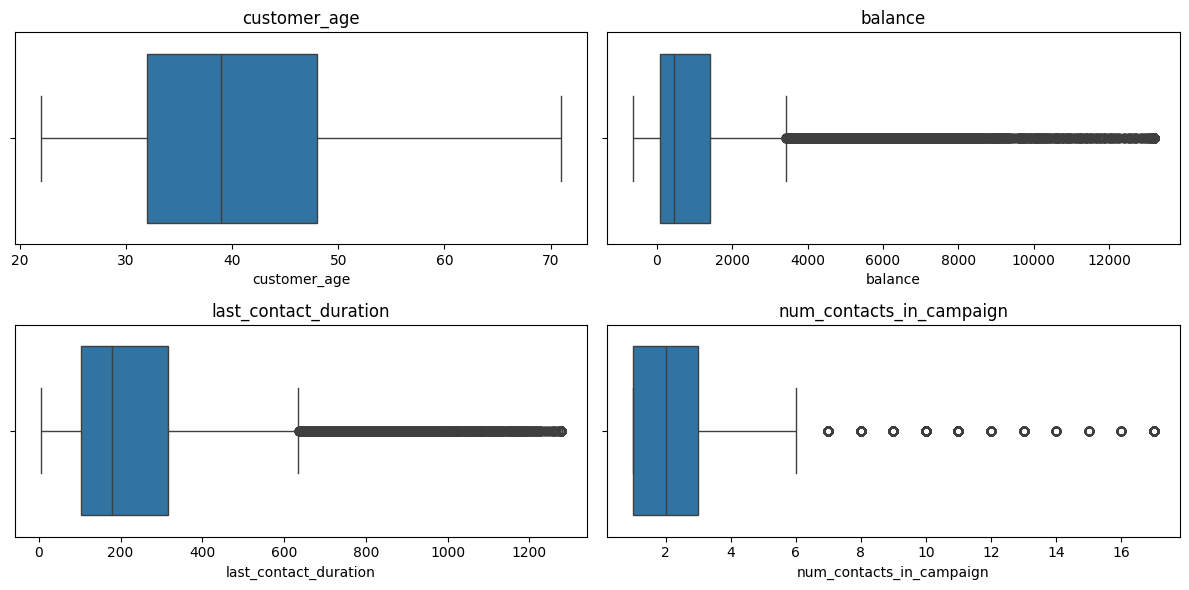

In [113]:
num_cols = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

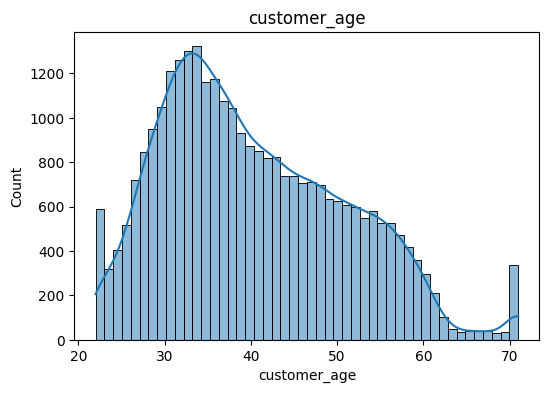

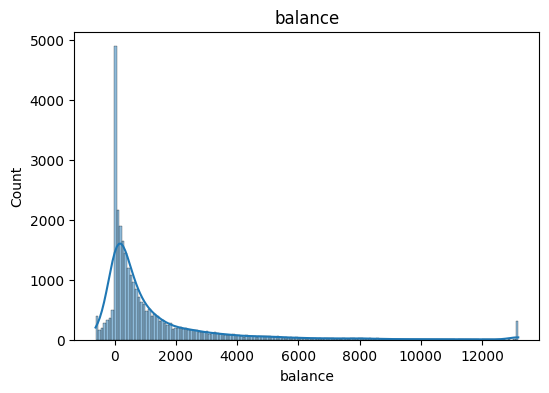

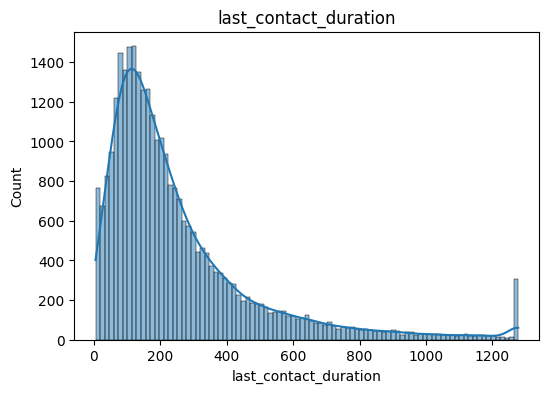

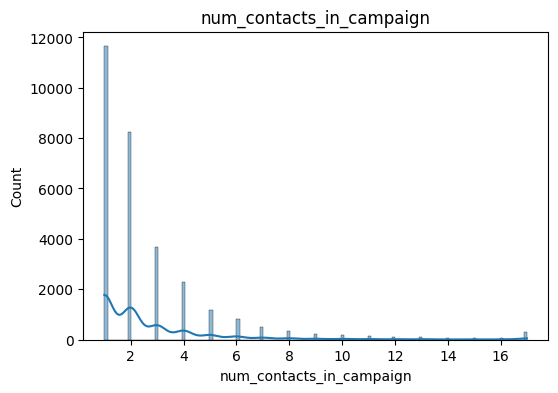

In [114]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29948 entries, 0 to 31646
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                29948 non-null  object 
 1   customer_age                      29948 non-null  float64
 2   job_type                          29948 non-null  object 
 3   marital                           29948 non-null  object 
 4   education                         29948 non-null  object 
 5   default                           29948 non-null  object 
 6   balance                           29948 non-null  float64
 7   housing_loan                      29948 non-null  object 
 8   personal_loan                     29948 non-null  object 
 9   communication_type                29948 non-null  object 
 10  day_of_month                      29948 non-null  int64  
 11  month                             29948 non-null  object 
 12  last_cont

In [116]:
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,was_contacted_prev
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0.0,0,unknown,0,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0,1
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0.0,0,unknown,0,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0.0,0,unknown,0,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0.0,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0,1
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0.0,0,unknown,0,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0.0,0,unknown,0,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,0.0,0,unknown,0,0


In [117]:
df['balance_per_contact'] = df['balance'] / (df['num_contacts_in_campaign'] + 1)
df['age_balance_product'] = df['customer_age'] * df['balance']
df['campaign_intensity'] = df['num_contacts_in_campaign'] * df['last_contact_duration']

In [118]:
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 30, 45, 60, 100], labels=['young', 'middle_aged', 'senior', 'elderly'])
df['balance_category'] = pd.qcut(df['balance'], q=3, labels=['low', 'medium', 'high'])

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [119]:
job_counts = df['job_type'].value_counts()
rare_jobs = job_counts[job_counts < 100].index
df['job_type_grouped'] = df['job_type'].where(~df['job_type'].isin(rare_jobs), 'other')
df['job_type_freq'] = df['job_type'].map(job_counts)

In [120]:
df['prev_campaign_success'] = ((df['was_contacted_prev'] == 1) & (df['prev_campaign_outcome'] == 'success')).astype(int)
df['high_contact'] = (df['num_contacts_in_campaign'] > df['num_contacts_in_campaign'].quantile(0.75)).astype(int)
df['recent_contact'] = (df['days_since_prev_campaign_contact'] <= 30).astype(int)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [121]:
df['contact_ratio'] = df['num_contacts_in_campaign'] / (df['num_contacts_prev_campaign'] + 1)

In [122]:
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,age_balance_product,campaign_intensity,age_group,balance_category,job_type_grouped,job_type_freq,prev_campaign_success,high_contact,recent_contact,contact_ratio
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,...,7980.0,1212.0,young,medium,management,6285,0,1,1,4.0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,...,31756.0,286.0,middle_aged,medium,blue-collar,6439,0,0,0,1.0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,...,30176.0,404.0,senior,medium,technician,4964,0,1,1,4.0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,...,68.0,381.0,middle_aged,low,services,2776,0,0,1,3.0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,...,55432.0,98.0,middle_aged,high,blue-collar,6439,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin,married,secondary,no,567.0,yes,no,cellular,...,32886.0,198.0,senior,medium,admin,3424,0,0,0,0.5
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,...,54672.0,217.0,senior,high,management,6285,0,1,1,7.0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,...,9922.0,178.0,middle_aged,medium,unemployed,865,0,0,1,2.0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,...,129552.0,1296.0,senior,high,services,2776,0,1,1,6.0


In [123]:
df.dtypes

id                                    object
customer_age                         float64
job_type                              object
marital                               object
education                             object
default                               object
balance                              float64
housing_loan                          object
personal_loan                         object
communication_type                    object
day_of_month                           int64
month                                 object
last_contact_duration                float64
num_contacts_in_campaign             float64
days_since_prev_campaign_contact     float64
num_contacts_prev_campaign             int64
prev_campaign_outcome                 object
term_deposit_subscribed                int64
was_contacted_prev                     int64
balance_per_contact                  float64
age_balance_product                  float64
campaign_intensity                   float64
age_group 

In [124]:
drop_columns = [
    'id', 'job_type', 'day_of_month', 'month',
    'age_group', 'balance_category'
]
df = df.drop(columns=drop_columns)

In [125]:
df.dtypes

customer_age                        float64
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
was_contacted_prev                    int64
balance_per_contact                 float64
age_balance_product                 float64
campaign_intensity                  float64
job_type_grouped                     object
job_type_freq                         int64
prev_campaign_success                 int64
high_contact                          int64
recent_contact                  

In [126]:
categorical_cols = [
    'marital', 'education', 'default', 'housing_loan',
    'personal_loan', 'communication_type', 'prev_campaign_outcome',
    'job_type_grouped'
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [127]:
df.dtypes

customer_age                        float64
balance                             float64
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
term_deposit_subscribed               int64
was_contacted_prev                    int64
balance_per_contact                 float64
age_balance_product                 float64
campaign_intensity                  float64
job_type_freq                         int64
prev_campaign_success                 int64
high_contact                          int64
recent_contact                        int64
contact_ratio                       float64
marital_married                        bool
marital_single                         bool
education_secondary                    bool
education_tertiary                     bool
education_unknown                      bool
default_yes                            bool
housing_loan_yes                

In [ ]:
target_col = "subscribed" if "subscribed" in df.columns else df.columns[-1]

X_df = df.drop(columns=[target_col]).copy()

In [133]:
for col in X_df.columns:
    X_df[col] = pd.to_numeric(X_df[col], errors="coerce")

X_df = X_df.fillna(X_df.mean())

In [134]:
X = X_df.values.astype(float)
y = pd.to_numeric(df[target_col], errors="coerce").fillna(0).astype(int).values

In [135]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # avoid division by zero
X = (X - X_mean) / X_std

X = np.hstack([np.ones((X.shape[0], 1)), X])

In [136]:
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)

train_size = int(0.8 * len(X))
X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

In [137]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [138]:
def compute_loss(y_true, y_pred):
    eps = 1e-10
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [139]:
def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    return (1/m) * np.dot(X.T, (y_pred - y))

In [140]:
def train_logistic_regression(X, y, lr=0.1, epochs=2000):
    weights = np.zeros(X.shape[1])
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        loss = compute_loss(y, y_pred)
        grad = compute_gradients(X, y, y_pred)
        weights -= lr * grad
        if epoch % 100 == 0:
            losses.append(loss)
    return weights, losses

weights, losses = train_logistic_regression(X_train, y_train, lr=0.1, epochs=2000)
print("✅ Model training complete!")

✅ Model training complete!


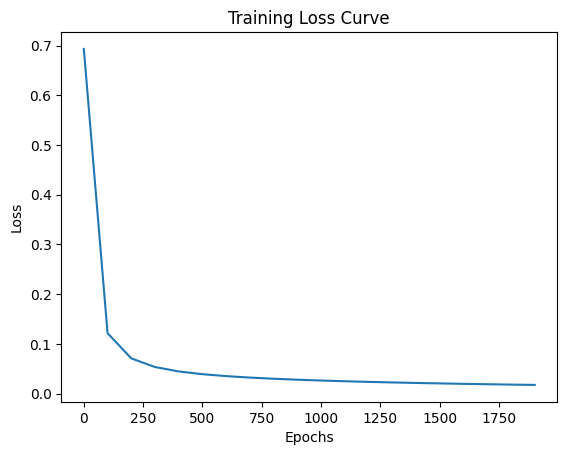

In [141]:
plt.plot(range(0, 2000, 100), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [142]:
z_test = np.dot(X_test, weights)
y_pred = sigmoid(z_test)
y_pred_class = (y_pred >= 0.5).astype(int)

accuracy = np.mean(y_pred_class == y_test)
print(f"🎯 Test Accuracy: {accuracy:.4f}")


🎯 Test Accuracy: 0.9950


In [143]:
TP = np.sum((y_pred_class == 1) & (y_test == 1))
TN = np.sum((y_pred_class == 0) & (y_test == 0))
FP = np.sum((y_pred_class == 1) & (y_test == 0))
FN = np.sum((y_pred_class == 0) & (y_test == 1))

print("\nConfusion Matrix:")
print(f"TP={TP}, FP={FP}, TN={TN}, FN={FN}")


Confusion Matrix:
TP=10, FP=0, TN=5950, FN=30


In [144]:
sample = X_test[0]
prob = sigmoid(np.dot(sample, weights))
print(f"\nSample Prediction → Prob: {prob:.3f}, Class: {1 if prob >= 0.5 else 0}")


Sample Prediction → Prob: 0.008, Class: 0


In [145]:
pd.DataFrame(df).to_csv("cleaned_data.csv", index=False)
np.save("weights.npy", weights)
np.save("feature_mean.npy", X_mean)
np.save("feature_std.npy", X_std)